SICA Generation Algorithm Additional Tests \
For SICA System, on CPU

Part 1: Dataset Generation

Imports

In [ ]:
from cax_sica.genetic.state import CurrentState as st2

import numpy as np
import jax.numpy as jnp
import time
from typing import List, Tuple

Trial 1: Dim Testing

In [ ]:
data: List[Tuple] = []
iter = 11
def generateicsrt(dim, num_steps, example = 0):
    ic = np.random.choice([0,0,0,1], size=(dim, dim))
    srt = np.random.choice([0,0,0,0,0,1], size=(num_steps, dim, dim, 18))
    return ic, srt
for i in range(100, 510, 5):
    print(f"OPERATING DIM: {i}")
    for _ in range(iter):
        print(f"ITER {_}")
        stepdim = [i,100,0]
        icsrt = generateicsrt(stepdim[0], stepdim[1])
        ic = icsrt[0]
        srt = icsrt[1]
        time_init = time.time()
        state = st2(initial=ic, rules=srt)
        st2res = state.generate()
        data.append((i,time.time()-time_init))




Trial 2: Timestep Testing


In [ ]:
data_time: List[Tuple] = []
iter = 11
def generateicsrt(dim, num_steps, example = 0):
    ic = np.random.choice([0,0,0,1], size=(dim, dim))
    srt = np.random.choice([0,0,0,0,0,1], size=(num_steps, dim, dim, 18))
    return ic, srt
for i in range(100, 510, 5):
    print(f"OPERATING TIMESTEP CT: {i}")
    for _ in range(iter):
        print(f"ITER {_}")
        stepdim = [200,i,0]
        icsrt = generateicsrt(stepdim[0], stepdim[1])
        ic = icsrt[0]
        srt = icsrt[1]
        time_init = time.time()
        state = st2(initial=ic, rules=srt)
        st2res = state.generate()
        data_time.append((i,time.time()-time_init))




Report results

In [ ]:
print(data)
print(data_time)

Part 2: Data Analysis 

Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from arraystat import stat

Clean data

In [2]:
#Adjust these values to be 455 - number of outliers.

dim_x = np.zeros((448))
dim_y = np.zeros((448))
step_x = np.zeros((454))
step_y = np.zeros((454))

#Remove first trials as they are outliers, as well as trial-specific outliers (dim: > 5.5s, step: > 2s)
dim_out = 0
step_out = 0
for i in range(0, len(data)):
    if (i%6):
        if (data[i][1] < 5.5):
            dim_x[i-1-int(np.floor(i/6)) - dim_out] = data[i][0]
            dim_y[i-1-int(np.floor(i/6)) - dim_out] = data[i][1]
        else:
            dim_out += 1
for i in range(0, len(data_time)):
    if (i%6):
        if (data_time[i][1] < 2):
            step_x[i-1-int(np.floor(i/6)) - step_out] = data_time[i][0]
            step_y[i-1-int(np.floor(i/6)) - step_out] = data_time[i][1]
        else:
            step_out += 1


Plot results

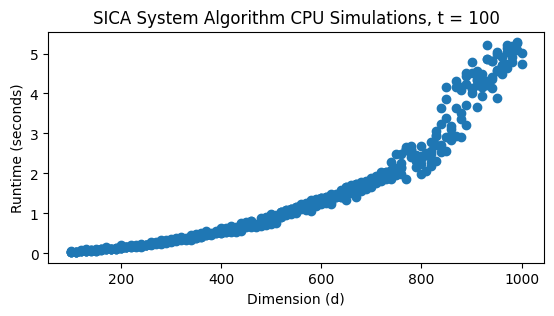

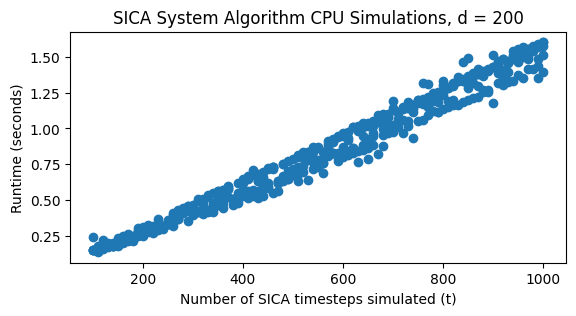

In [3]:
"""Dim plots."""
plt.figure().set_figheight(3)
plt.plot(dim_x, dim_y, 'o')
plt.xlabel(f"Dimension (d)")
plt.ylabel("Runtime (seconds)")
plt.title("SICA System Algorithm CPU Simulations, t = 100")
plt.show()

"""Timestep plots."""
plt.figure().set_figheight(3)
plt.plot(step_x, step_y, 'o', label='original data')
plt.xlabel(f"Number of SICA timesteps simulated (t)")
plt.ylabel("Runtime (seconds)")
plt.title("SICA System Algorithm CPU Simulations, d = 200")
plt.show()

Statistical Analysis for Alg Speed

In [4]:
cpudim = dim_y / (dim_x * dim_x * 100)
cpustep = step_y / (step_x * 40000)
print(f"Dim trials: mean {stat(cpudim)[0]}, std: {stat(cpudim)[1]}")
print(f"Step trials: mean {stat(cpustep)[0]}, std: {stat(cpustep)[1]}")

Dim trials: mean 3.8732528938959794e-08, std: 6.755333617925215e-09
Step trials: mean 3.6818701022276326e-08, std: 3.304037840314607e-09
